In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.3970996  0.34611923 0.4127859 ]
  [0.39826643 0.34728605 0.4139527 ]
  [0.40721723 0.35623682 0.4229035 ]
  ...
  [0.5169461  0.4659657  0.5365539 ]
  [0.40116036 0.35017994 0.4207682 ]
  [0.4148041  0.3638237  0.43441194]]

 [[0.41670704 0.36572665 0.43239334]
  [0.41677073 0.36579034 0.432457  ]
  [0.41906837 0.36808798 0.43475464]
  ...
  [0.52117926 0.47019887 0.5407871 ]
  [0.41885036 0.36786997 0.4384582 ]
  [0.42747822 0.37649783 0.44708607]]

 [[0.41960788 0.36862746 0.43529415]
  [0.41905463 0.36807424 0.4347409 ]
  [0.41707864 0.36609825 0.43276492]
  ...
  [0.5335296  0.4825492  0.5531374 ]
  [0.5145599  0.4635795  0.53416777]
  [0.49545208 0.4444717  0.5150599 ]]

 ...

 [[0.6127491  0.5970628  0.65588635]
  [0.6172935  0.6016072  0.6604307 ]
  [0.610518   0.59483165 0.65365523]
  ...
  [0.61925197 0.6035657  0.65846765]
  [0.60963774 0.59395146 0.6488534 ]
  [0.6082832  0.59259695 0.6474989 ]]

 [[0.61606777 0.6003815  0.659205  ]
  [0.625079   0.6093927  0.6682162 ]


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 66s 1s/step - loss: 0.8969 - accuracy: 0.4830 - val_loss: 0.8523 - val_accuracy: 0.5990
Epoch 2/20
47/47 [==============================] - 53s 1s/step - loss: 0.7955 - accuracy: 0.5970 - val_loss: 0.7078 - val_accuracy: 0.6875
Epoch 3/20
47/47 [==============================] - 50s 1s/step - loss: 0.5523 - accuracy: 0.7259 - val_loss: 0.4189 - val_accuracy: 0.8125
Epoch 4/20
47/47 [==============================] - 51s 1s/step - loss: 0.3653 - accuracy: 0.8507 - val_loss: 0.3329 - val_accuracy: 0.8594
Epoch 5/20
47/47 [==============================] - 51s 1s/step - loss: 0.2871 - accuracy: 0.8887 - val_loss: 0.3748 - val_accuracy: 0.8542
Epoch 6/20
47/47 [==============================] - 51s 1s/step - loss: 0.3815 - accuracy: 0.8270 - val_loss: 0.3218 - val_accuracy: 0.8698
Epoch 7/20
47/47 [==============================] - 51s 1s/step - loss: 0.2741 - accuracy: 0.8853 - val_loss: 0.2228 - val_accuracy: 0.9010
Epoch 8/20
47/47 [==

In [15]:
scores = model.evaluate(test_generator)


14/14 [==============================] - 14s 987ms/step - loss: 0.1680 - accuracy: 0.9281


In [16]:
scores


[0.16796298325061798, 0.9280742406845093]

In [17]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 47}

In [18]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

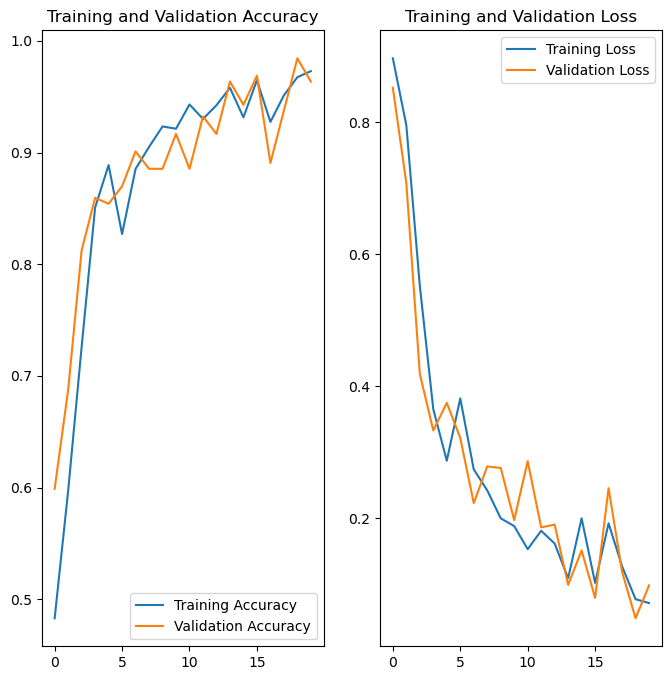

In [20]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 600ms/step
predicted label: Potato___Early_blight


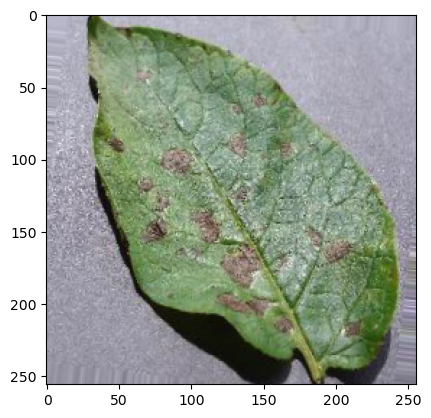

In [23]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


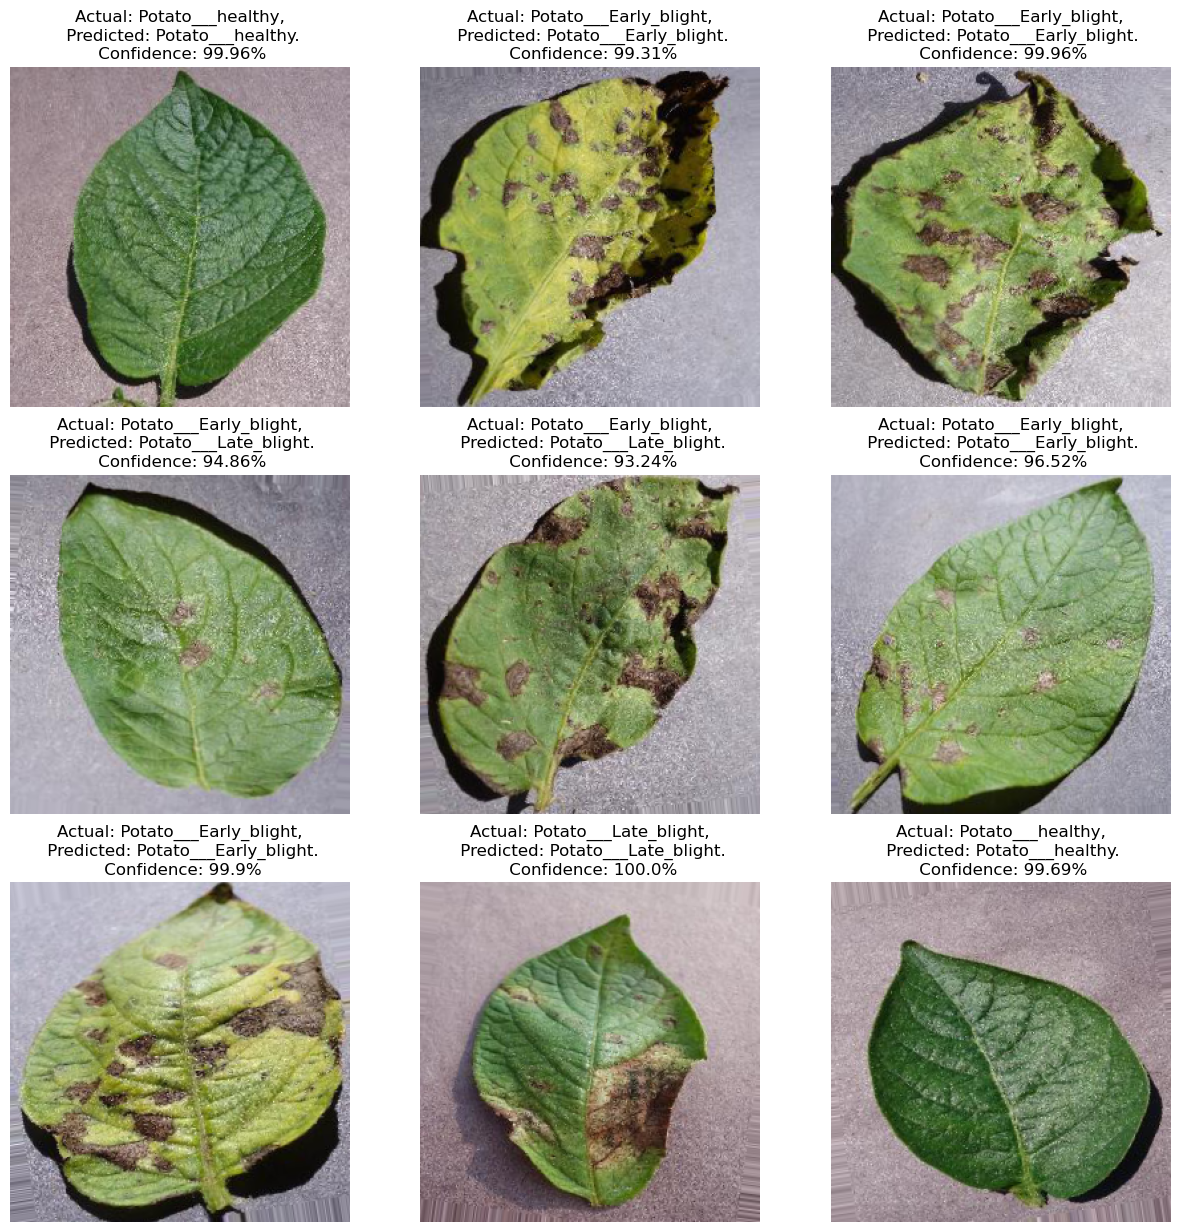

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [28]:
model.save("../potatoes.h5")

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
